Non-linear transformation techniques like Yeo-Johnson, Quantile, and Box-Cox are used to make data more suitable for machine learning models by addressing skewness, stabilizing variance, and improving normality. Here's an overview of when and why to use each:

---

### 1. **Box-Cox Transformation**  
**Use When:**
- The data contains **only positive values**.
- You need to stabilize **variance** and correct **skewness** for linear models.

**Why:**
- Box-Cox assumes the data can be transformed to a normal distribution by finding the optimal λ parameter.
- Commonly used in time series and regression modeling.

---

### 2. **Yeo-Johnson Transformation**  
**Use When:**
- The data contains both **positive and negative** values.
- You need to handle **mild to strong skewness** in the data.
- A parametric model (like linear regression) assumes normality in residuals.

**Why:**
- Yeo-Johnson is an extension of Box-Cox and works for data with negative values.
- It adjusts skewness and brings the data closer to a Gaussian distribution.

---

### 3. **Quantile Transformation**  
**Use When:**
- The data is **highly skewed**, and a Gaussian-like distribution is desired.
- You are dealing with **outliers** that may affect model performance.
- You want a **non-parametric approach** (doesn't assume a specific distribution).

**Why:**
- It maps the data to a uniform or normal distribution using quantile information.
- Robust to outliers since it focuses on the data's rank.

**Key Points:**
- Can overfit if applied to small datasets.
- Works well with tree-based models, as it smooths outliers.

---

### Key Considerations:
- **Pipeline Integration:** Always include transformations in your preprocessing pipeline to avoid data leakage.
- **Model Compatibility:** While transformations help, certain models like decision trees and ensembles are less sensitive to data distribution.
- **Hyperparameter Tuning:** Quantile transformation may require specifying `n_quantiles` for optimal performance.
- **Performance Evaluation:** Always compare model performance with and without transformations to ensure improvement.

### Practical Scenarios:

| Transformation | Suitable Dataset Characteristics                                      | Example Use Case                         |
|-----------------|----------------------------------------------------------------------|------------------------------------------|
| Yeo-Johnson     | Mixed sign values, mild to strong skewness                           | Customer satisfaction scores             |
| Quantile        | Highly skewed data, with or without outliers                        | Income distribution, house prices        |
| Box-Cox         | Positive values, mild skewness, variance stabilization needed       | Monthly sales, power consumption         |

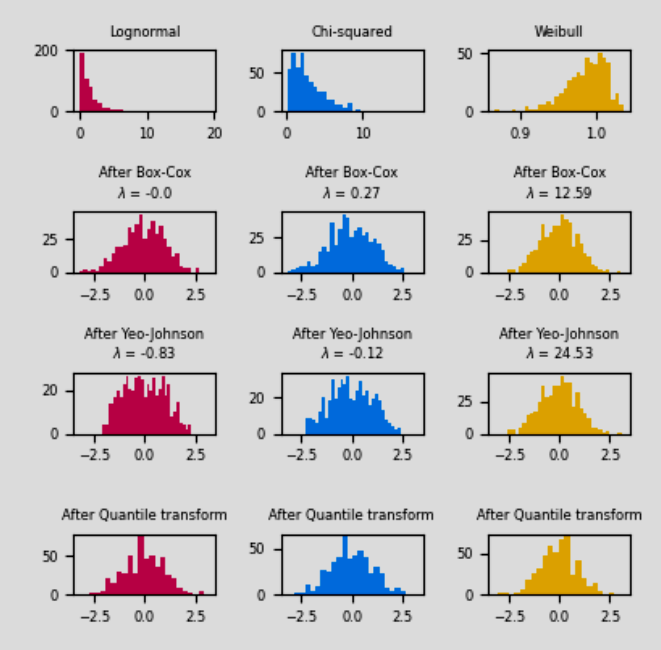

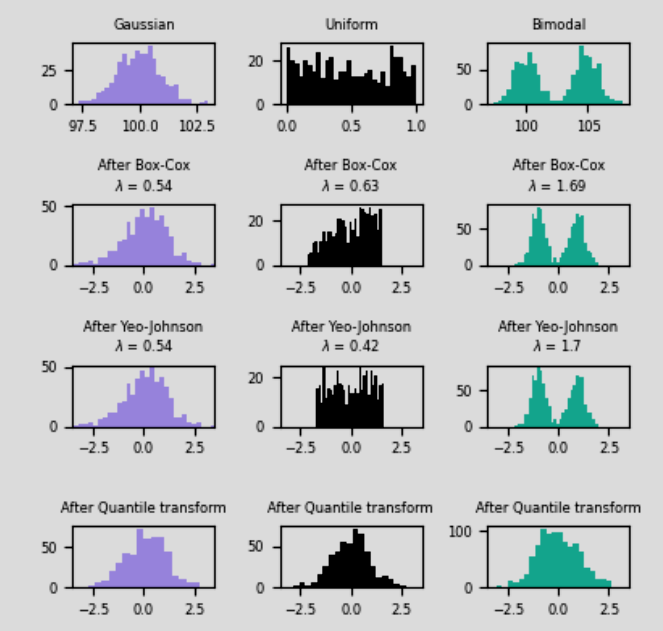

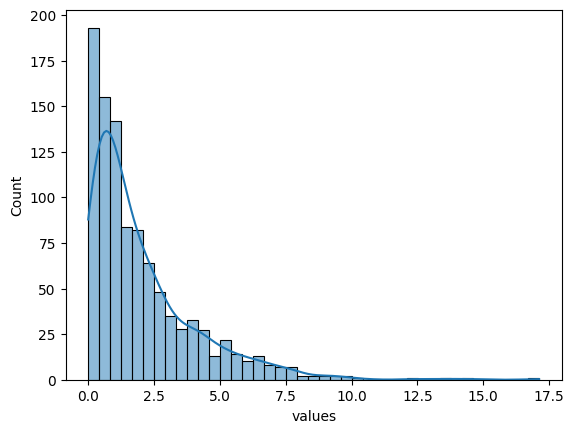

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns 
import matplotlib.pyplot as plt


np.random.seed(0)
df=pd.DataFrame(np.random.exponential(size=1000, scale=2),columns=['values'])
sns.histplot(df['values'], kde=True)
plt.show()

# BOX-COX TRANSFORMATION

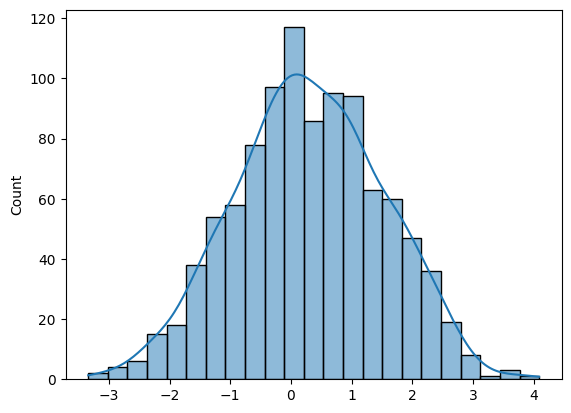

0.2420131978174451


In [8]:
from scipy.stats import boxcox

transformed_boxcox, lambda_value = boxcox(df['values'])
sns.histplot(transformed_boxcox, kde=True)
plt.show()
print(lambda_value)

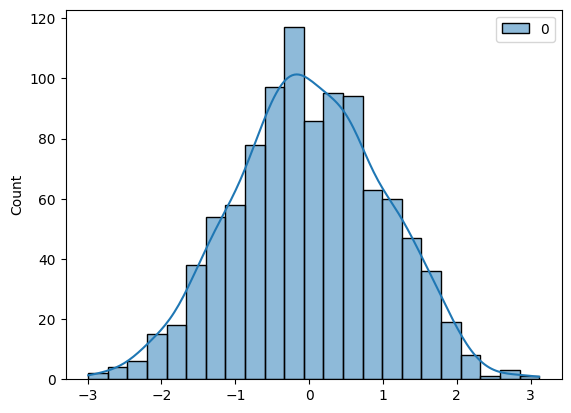

[0.2420132]


In [14]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

boxcox=PowerTransformer(method='box-cox', standardize=True)
transformed_boxcox=boxcox.fit_transform((df[['values']]))
sns.histplot(transformed_boxcox, kde=True)
plt.show()
print(boxcox.lambdas_)

# Yeo-Johnson Transformation

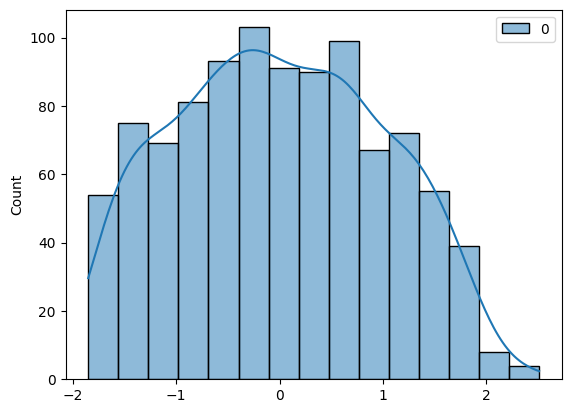

[-0.41266614]


In [28]:
yeoJohn=PowerTransformer(method='yeo-johnson', standardize=True)
transformed_yeoJohn=yeoJohn.fit_transform(df[['values']])
sns.histplot(transformed_yeoJohn,kde=True)
plt.show()
print(yeoJohn.lambdas_)

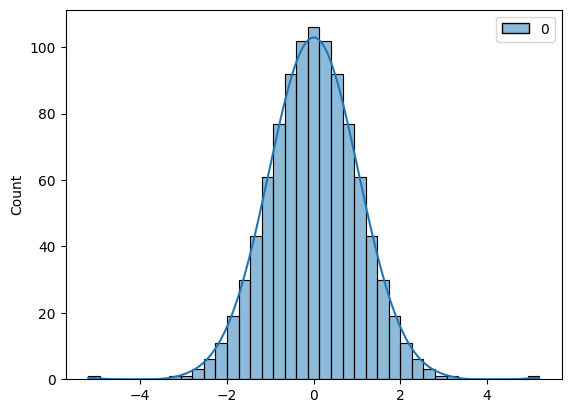

In [33]:
from sklearn.preprocessing import QuantileTransformer

QuantileT=QuantileTransformer(output_distribution='normal', random_state=0)
transformed_QuantileT=QuantileT.fit_transform(df[['values']])
sns.histplot(transformed_QuantileT,kde=True)
plt.show()

### **How Does Transformation Change Data?**
Transformations modify the data by applying mathematical operations to each data point. The goal is to alter the distribution or scale of the data, often to meet the assumptions of statistical models or improve machine learning model performance.

Here’s how common transformations affect data:

1. **Box-Cox Transformation**:
   - Stabilizes variance and makes the data more Gaussian-like.
   - Requires strictly positive data.
   - Controlled by a parameter λ, which determines the power of the transformation:
     
     \[
     y' = 
     \begin{cases} 
     \frac{y^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
     \ln(y), & \text{if } \lambda = 0 
     \end{cases}
     \]

2. **Yeo-Johnson Transformation**:
   - Similar to Box-Cox but can handle both positive and negative values.
   - Also uses a parameter λ to determine the transformation.

3. **Quantile Transformation**:
   - Maps the data to a target distribution (e.g., Gaussian or uniform) by ranking and interpolating.
   - Does not rely on a mathematical formula or parameters like λ; instead, it adjusts the cumulative distribution.

### **Why is Transformation Still Relevant?**

Transformations remain crucial for several reasons:

1. **Improving Model Assumptions**:
   - Many statistical models (e.g., linear regression, ANOVA) assume that the data is normally distributed, has constant variance, or a linear relationship between variables. Transformations help meet these assumptions.

2. **Handling Skewness**:
   - Real-world data often exhibits skewness. Transformations (e.g., log or Box-Cox) reduce skewness, making the data more symmetric and easier to model.

3. **Dealing with Outliers**:
   - Some transformations compress extreme values, reducing the influence of outliers.

4. **Linearizing Relationships**:
   - Non-linear relationships can be linearized through transformations, allowing linear models to capture the relationships effectively.

5. **Scaling for Machine Learning**:
   - Many machine learning algorithms perform better when features are scaled or normalized. Transformations like `QuantileTransformer` or `PowerTransformer` ensure that the data fits the expected input format.

6. **Improving Interpretability**:
   - Transformed data can often be interpreted more meaningfully, especially in the context of ratios, percentages, or exponential growth.

---

### **When is Transformation Necessary?**
- **Statistical Assumptions**: Your model assumes normality, constant variance, or linearity.
- **High Skewness**: Data distributions are heavily skewed or non-Gaussian.
- **Presence of Outliers**: Extreme values dominate the analysis.
- **Machine Learning Models**: Algorithms like k-NN, SVM, or neural networks benefit from well-distributed features.

---

### **Key Takeaway**
Transformation changes the distribution, scale, or relationships in the data to align it with the needs of statistical or machine learning models. It remains relevant because many analytical techniques assume specific data properties, and transformations help ensure these assumptions are valid.

### **Quantile Transformation**

**Quantile transformation** is a non-parametric method that maps data to a target distribution (e.g., uniform or Gaussian) using its quantiles. It adjusts the data so that its cumulative distribution matches the desired target distribution. 

---

### **What Are Quantiles?**
Quantiles divide the data into equally sized intervals:
- The \(p\)-th quantile is the value below which \(p\%\) of the data falls.
- Common examples include:
  - Median (\(50\%\)-quantile): Splits data into two halves.
  - Quartiles (\(25\%\), \(50\%\), \(75\%\)-quantiles): Divide data into four parts.

In essence, quantiles describe the rank or position of data points relative to the entire dataset.

---

### **Why Is Quantile Transformation Accurate?**
1. **Non-parametric Nature**:
   - It doesn’t assume any mathematical form for the data’s distribution.
   - Works well even if the data is heavily skewed or irregularly distributed.

2. **Aligns Cumulative Distributions**:
   - Maps the empirical cumulative distribution of the data to a target cumulative distribution (e.g., normal or uniform). This ensures that the output closely resembles the specified target distribution.

3. **Robust to Outliers**:
   - Since it works on ranks, extreme values have less influence compared to parametric transformations.

---

### **Mathematical Process of Quantile Transformation**
Let \(x\) be a data point in the original dataset:

1. Rank the data:
   - Compute the rank \(r_i\) of \(x\) in the dataset.
   - \(r_i = \text{rank}(x_i)\), where ranks are from 1 to \(n\) (size of the dataset).

2. Compute the cumulative probability:
   \[
   p_i = \frac{r_i}{n + 1}
   \]
   - This ensures no extreme values are mapped to \(0\) or \(1\).

3. Map to the target distribution:
   - For a target Gaussian distribution, use the inverse cumulative distribution function (CDF):
     \[
     x'_i = \Phi^{-1}(p_i)
     \]
     Where \(\Phi^{-1}\) is the inverse CDF (quantile function) of the standard normal distribution.

---

### **How Is Quantile Transformation Different from Yeo-Johnson or Box-Cox?**
| **Aspect**               | **Quantile Transformation**                           | **Yeo-Johnson Transformation**                     | **Box-Cox Transformation**                       |
|--------------------------|------------------------------------------------------|--------------------------------------------------|-------------------------------------------------|
| **Type**                | Non-parametric                                       | Parametric                                       | Parametric                                      |
| **Input Data**          | Handles any data                                     | Handles positive and negative data               | Only works with positive data                   |
| **Control Parameter**   | None (rank-based)                                    | \(λ\) (parameter for power adjustment)    | \(λ\) (parameter for power adjustment)    |
| **Output Distribution** | Maps to specified distribution (e.g., Gaussian)      | Makes data Gaussian-like                        | Makes data Gaussian-like                       |
| **Sensitivity to Outliers** | Robust to outliers                                  | Sensitive to outliers                            | Sensitive to outliers                           |

---

### **Yeo-Johnson and Box-Cox: The Role of \(λ\)**

Both Yeo-Johnson and Box-Cox are parametric transformations that rely on the **\(λ\)** parameter. This parameter determines how the data is transformed:

#### **Box-Cox Transformation**
For positive data \(x > 0\):
\[
y' = 
\begin{cases} 
\frac{x^λ - 1}{λ}, & \text{if } λ \neq 0 \\
\ln(x), & \text{if } λ = 0 
\end{cases}
\]

#### **Yeo-Johnson Transformation**
For any real number \(x\):
\[
y' = 
\begin{cases} 
\frac{((x + 1)^λ - 1)}{λ}, & \text{if } λ \neq 0, x \geq 0 \\
\ln(x + 1), & \text{if } λ = 0, x \geq 0 \\
-\frac{((|x| + 1)^{2 - λ} - 1)}{2 - λ}, & \text{if } λ \neq 2, x < 0 \\
-\ln(|x| + 1), & \text{if } λ = 2, x < 0
\end{cases}
\]

---

### **How \(λ\) Is Determined**
1. **Maximum Likelihood Estimation (MLE)**:
   - \(λ\) is chosen to maximize the likelihood of the transformed data being normally distributed.

2. **Impact of \(λ\)**:
   - \(λ = 1\): No transformation (identity function).
   - \(λ = 0\): Logarithmic transformation.
   - Other values of \(λ\): Apply power transformations to stabilize variance.

---

### **Summary**
1. **Quantile Transformation**: Best for mapping data to a target distribution; non-parametric and robust to outliers.
2. **Box-Cox and Yeo-Johnson**: Parametric transformations that rely on \(λ\) to stabilize variance and make data Gaussian-like.
3. **\(λ\)**: Controls the type of power transformation applied; determined using MLE to best fit the transformed data to a normal distribution.